In [157]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from datetime import date
import warnings
warnings.filterwarnings('ignore')

In [158]:
variable_customer_df = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')
variable_customer_df.shape

(9134, 24)

In [159]:
variable_customer_df.isna().sum()/len(variable_customer_df)

Customer                         0.0
State                            0.0
Customer Lifetime Value          0.0
Response                         0.0
Coverage                         0.0
Education                        0.0
Effective To Date                0.0
EmploymentStatus                 0.0
Gender                           0.0
Income                           0.0
Location Code                    0.0
Marital Status                   0.0
Monthly Premium Auto             0.0
Months Since Last Claim          0.0
Months Since Policy Inception    0.0
Number of Open Complaints        0.0
Number of Policies               0.0
Policy Type                      0.0
Policy                           0.0
Renew Offer Type                 0.0
Sales Channel                    0.0
Total Claim Amount               0.0
Vehicle Class                    0.0
Vehicle Size                     0.0
dtype: float64

as we can see here there are no Nan values in the dataset.

here we are snake casing the column heads

In [160]:

def fe8 (x:str):
    x = x.replace(" ","_")
    x = x.replace("/", "_")
    return x.lower()

variable_customer_df.columns = list(map(fe8, variable_customer_df.columns))
variable_customer_df

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


changing the format of the date column

In [161]:
variable_customer_df['effective_to_date'] = pd.to_datetime(variable_customer_df['effective_to_date'], errors='coerce') 
variable_customer_df[['effective_to_date']]

,effective_to_date
0,2011-02-24
1,2011-01-31
2,2011-02-19
3,2011-01-20
4,2011-02-03
...,...
9129,2011-02-10
9130,2011-02-12
9131,2011-02-06
9132,2011-02-03


define a function that separate the discrete from the continuous

In [162]:
nums = variable_customer_df.select_dtypes(np.number)

def discrete_continuous(df):
    d_lst = []
    c_lst = []
    for col in df.columns:
        if len(df[col].unique()) < (df.shape[0] * 0.03):
            d_lst.append(col)
        else:
            c_lst.append(col)

    continuous_df = df[c_lst]
    discrete_df = df[d_lst]
    return continuous_df, discrete_df 

continuous_df, discrete_df = discrete_continuous(nums)

In [163]:
continuous_df

,customer_lifetime_value,income,total_claim_amount
0,2763.519279,56274,384.811147
1,6979.535903,0,1131.464935
2,12887.431650,48767,566.472247
3,7645.861827,0,529.881344
4,2813.692575,43836,138.130879
...,...,...,...
9129,23405.987980,71941,198.234764
9130,3096.511217,21604,379.200000
9131,8163.890428,0,790.784983
9132,7524.442436,21941,691.200000


In [164]:
discrete_df

,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,69,32,5,0,1
1,94,13,42,0,8
2,108,18,38,0,2
3,106,18,65,0,7
4,73,12,44,0,1
...,...,...,...,...,...
9129,73,18,89,0,2
9130,79,14,28,0,1
9131,85,9,37,3,2
9132,96,34,3,0,3


In [165]:

# continuous_df = variable_customer_df.select_dtypes(include = float)
# display(continuous_df)
# discrete_df = variable_customer_df.select_dtypes(include = int)
# discrete_df

,customer_lifetime_value,income,total_claim_amount
customer_lifetime_value,1.000000,0.024366,0.226451
income,0.024366,1.000000,-0.355254
total_claim_amount,0.226451,-0.355254,1.000000


<AxesSubplot:>

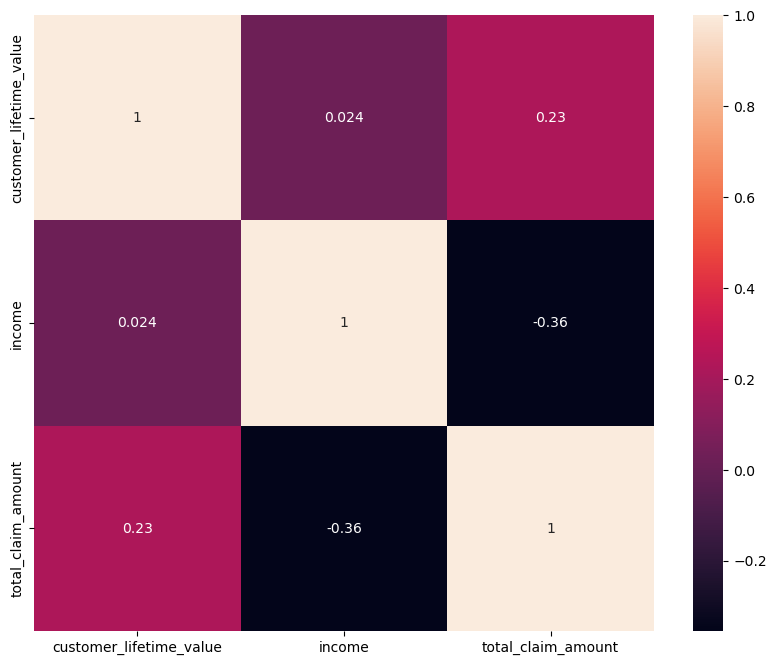

In [166]:
corr_matrix1 = continuous_df.corr()
display(corr_matrix1)

plt.figure(figsize = (10,8))
display(sns.heatmap(corr_matrix1, annot = True))

plt.show()

,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
monthly_premium_auto,1.000000,0.005026,0.020257,-0.013122,-0.011233
months_since_last_claim,0.005026,1.000000,-0.042959,0.005354,0.009136
months_since_policy_inception,0.020257,-0.042959,1.000000,-0.001158,-0.013333
number_of_open_complaints,-0.013122,0.005354,-0.001158,1.000000,0.001498
number_of_policies,-0.011233,0.009136,-0.013333,0.001498,1.000000


<AxesSubplot:>

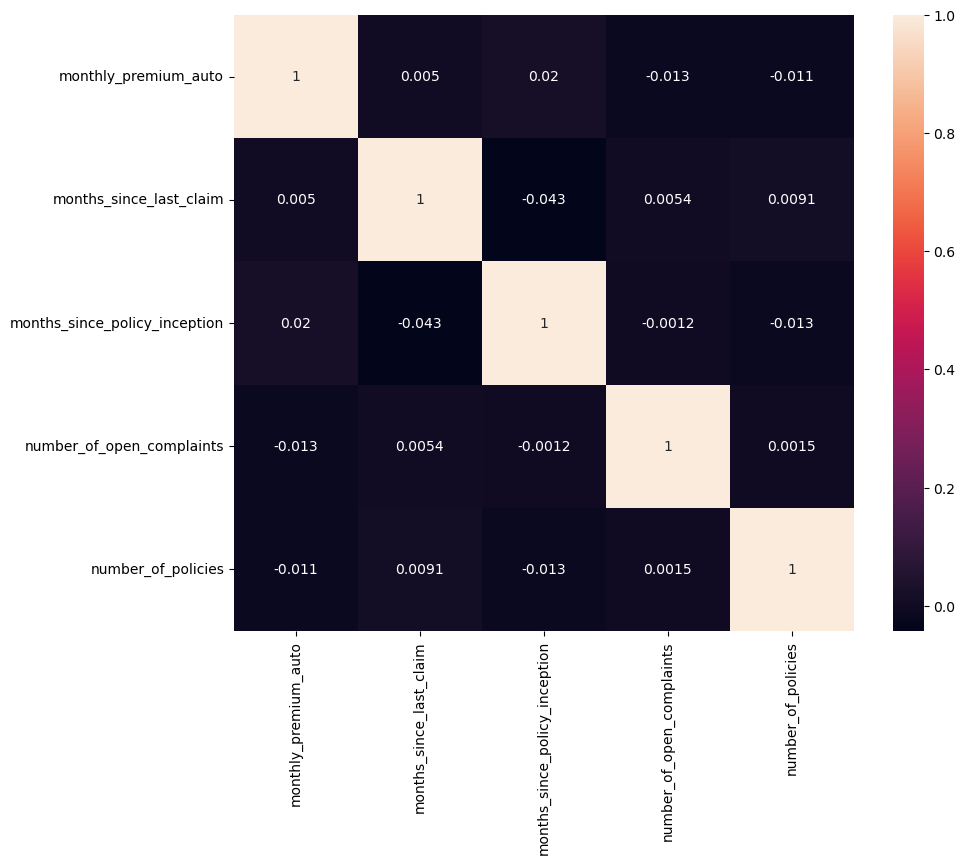

In [167]:
corr_matrix2 = discrete_df.corr()
display(corr_matrix2)

plt.figure(figsize = (10,8))
display(sns.heatmap(corr_matrix2, annot = True))
plt.show()

<AxesSubplot:>

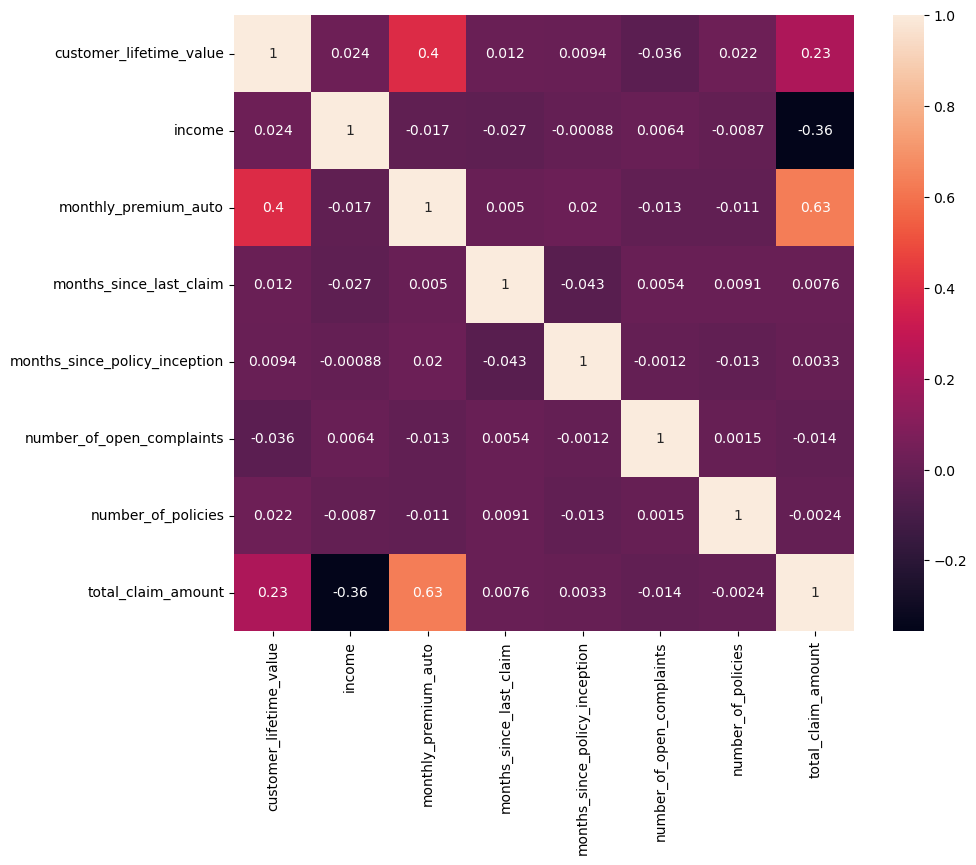

In [168]:
corr_matrix = nums.corr()
plt.figure(figsize = (10,8))
display(sns.heatmap(corr_matrix, annot = True))
plt.show()

assuming the target will still be the total amount claim, we can inferred from those heat maps , that thera re no clear colinearity from the numerical features to the target.

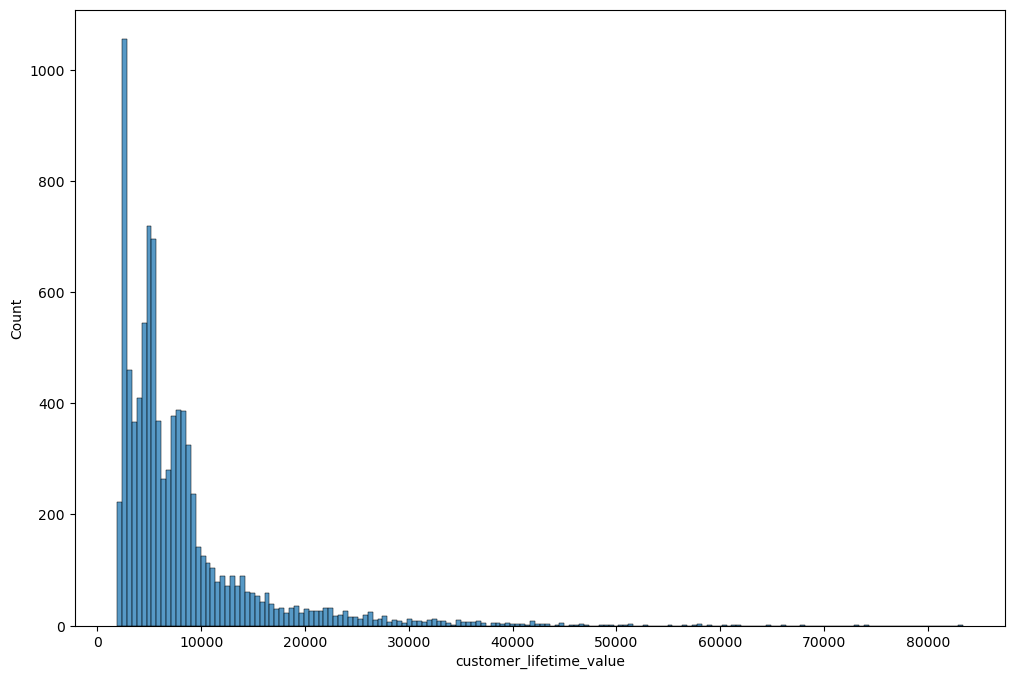

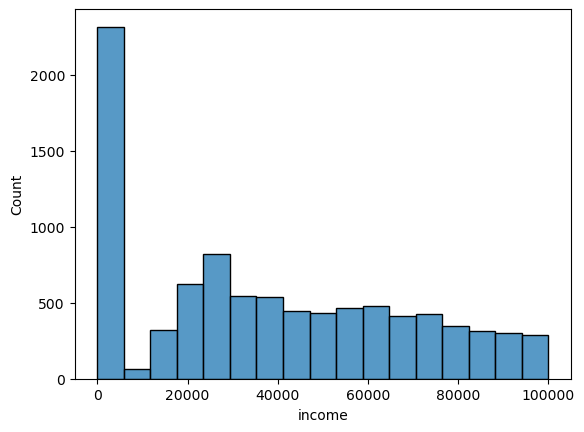

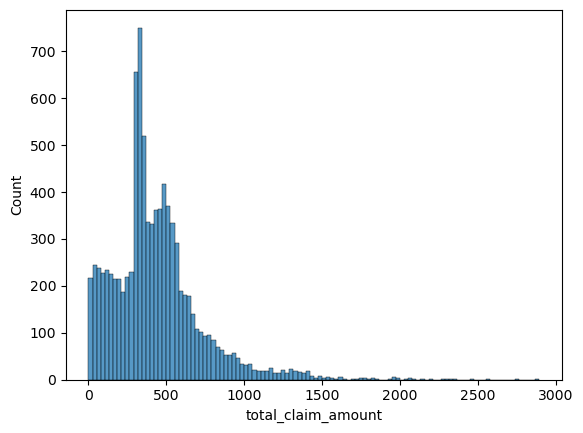

In [169]:
plt.figure(figsize = (12,8))
for column in continuous_df:
    sns.histplot(nums[column])
    plt.show()


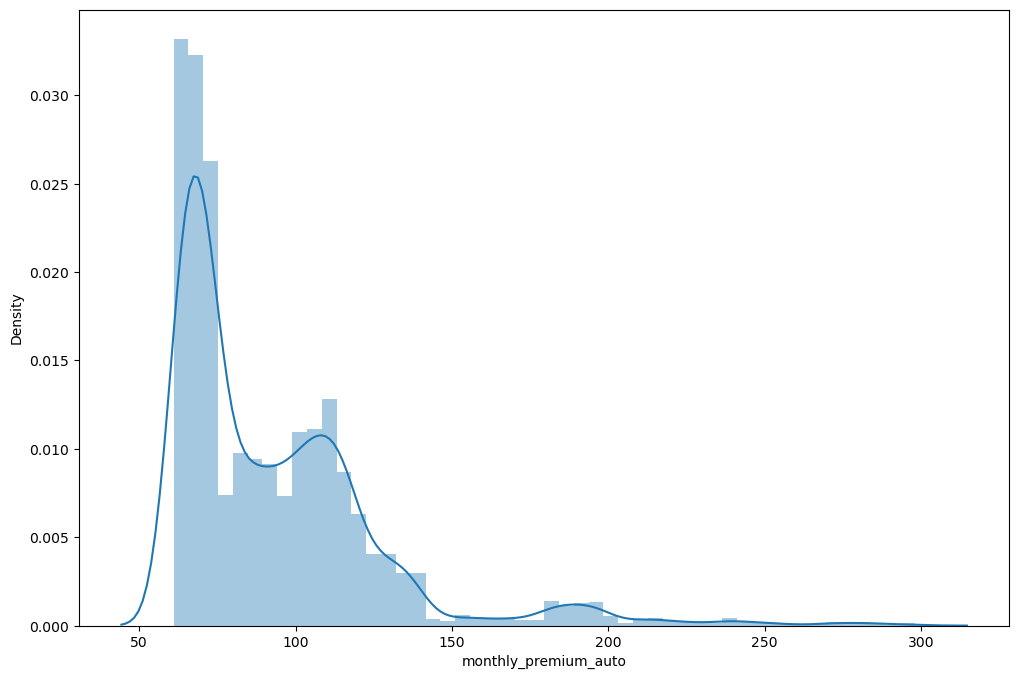

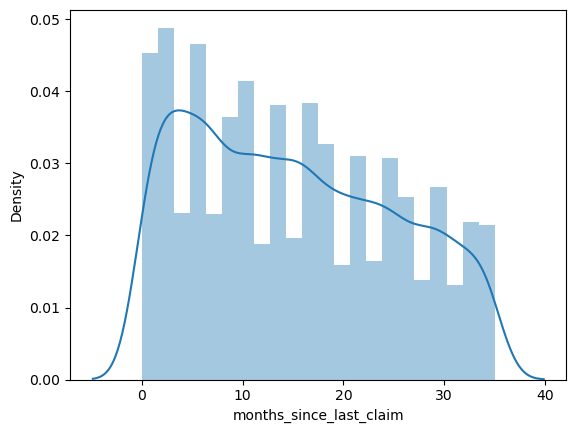

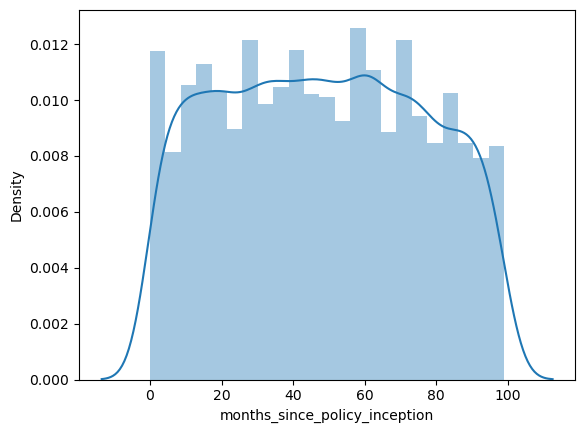

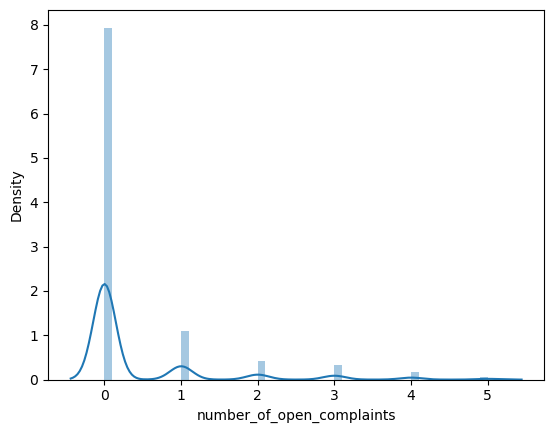

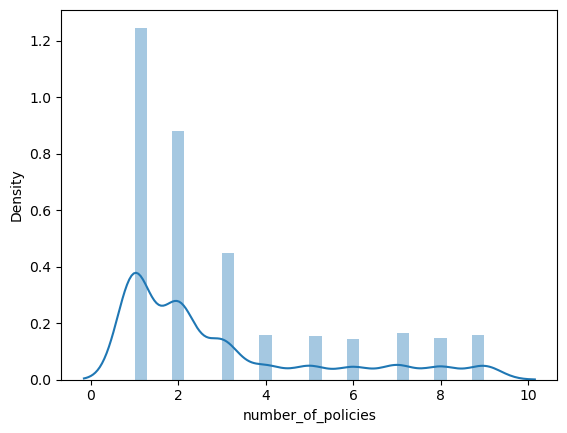

In [170]:
plt.figure(figsize = (12,8))
for column in discrete_df:
    sns.distplot(nums[column])
    plt.show()


9. we can can from the plots that we have outliers in some columns, and some distribution are not well distributed e.g. Income, total claim amount number of complaints.

Monthly premium auto has the outliers

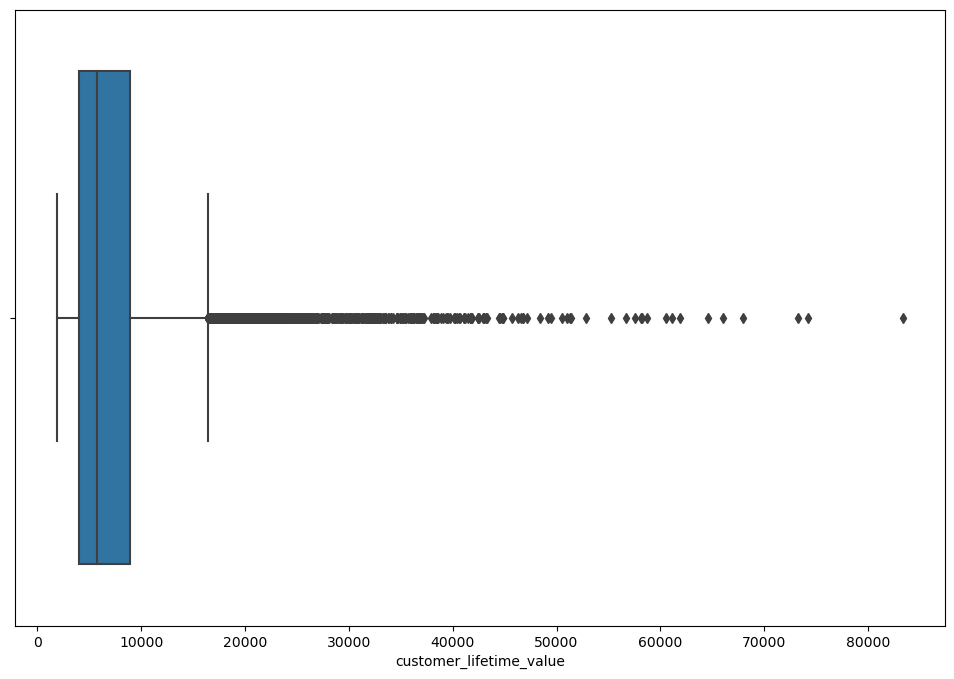

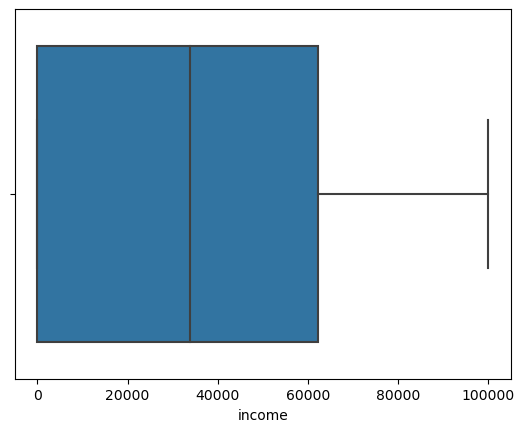

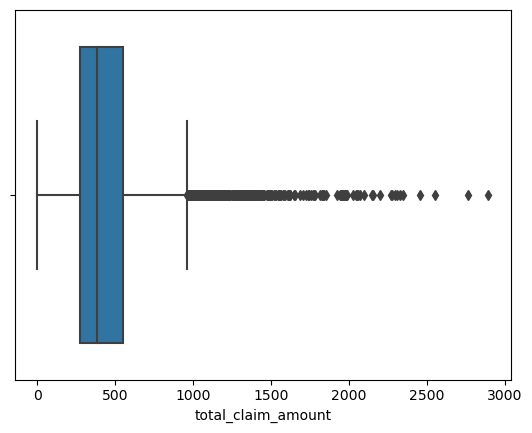

In [171]:

plt.figure(figsize = (12,8))
for column in continuous_df:
    sns.boxplot(nums[column])
    plt.show()

checking for outliers in the continuous variables

In [172]:
def find_outlier(col):
    q1, q3 = np.percentile(sorted(col), [25, 75])
    iqr = q3 - q1
   
    lower = q1 - (1.5 * iqr)
    whisker = q3 + (1.5 * iqr)
    outliers = [x for x in col if lower or x >= whisker]
    return outliers

tca_outliers = find_outlier(nums['total_claim_amount'])
mpa_outliers = find_outlier(nums['monthly_premium_auto'])



In [173]:
tca_outliers
mpa_outliers

pd.DataFrame(data = tca_outliers)

,0
0,384.811147
1,1131.464935
2,566.472247
3,529.881344
4,138.130879
...,...
9129,198.234764
9130,379.200000
9131,790.784983
9132,691.200000


In [174]:

nums.isna().sum()

customer_lifetime_value          0
income                           0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
total_claim_amount               0
dtype: int64

we have no Nan values

In [175]:
categorical_df = variable_customer_df.select_dtypes(np.object)
categorical_df

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [176]:
categorical_df = categorical_df.drop(['customer'], axis = 1)  # here we drop date aswell because it was use in the numerical data
categorical_df

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


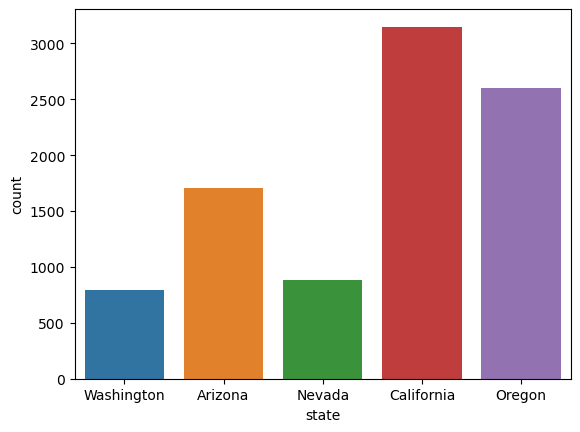

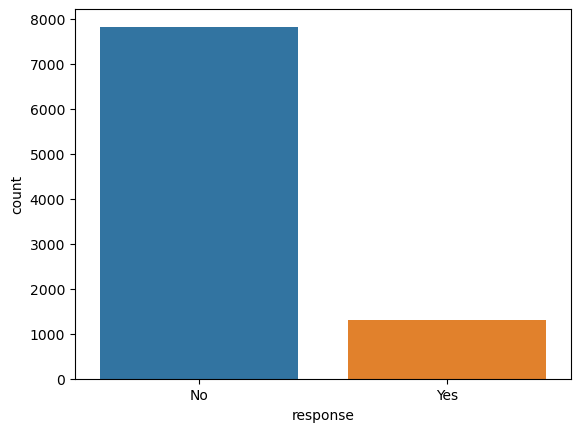

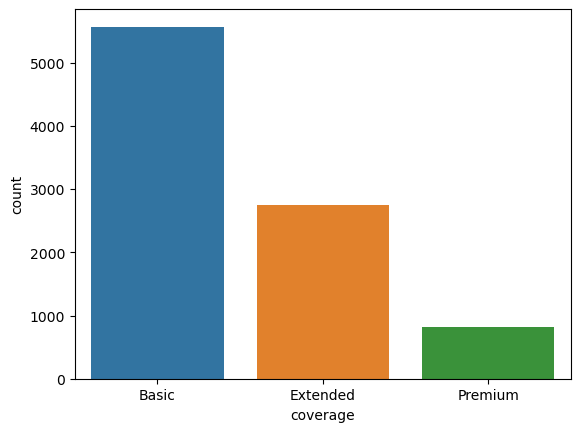

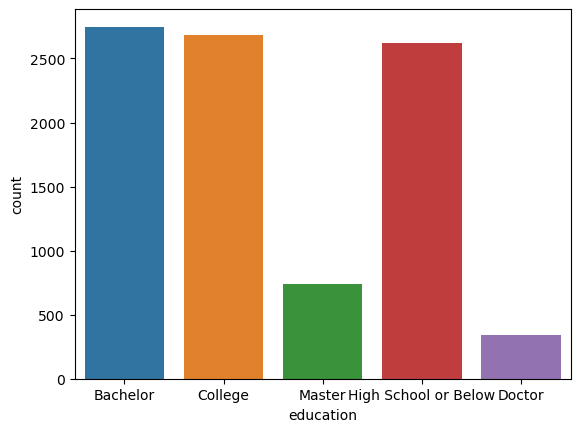

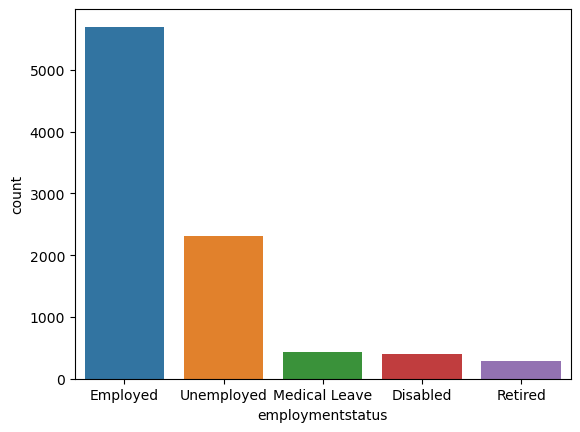

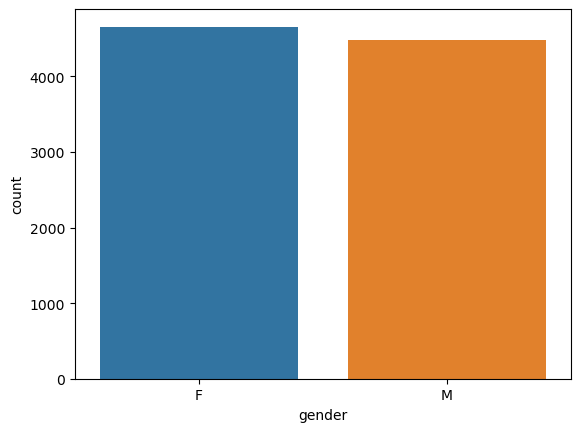

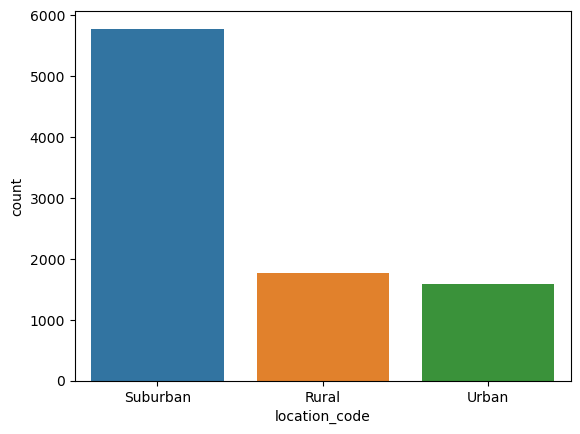

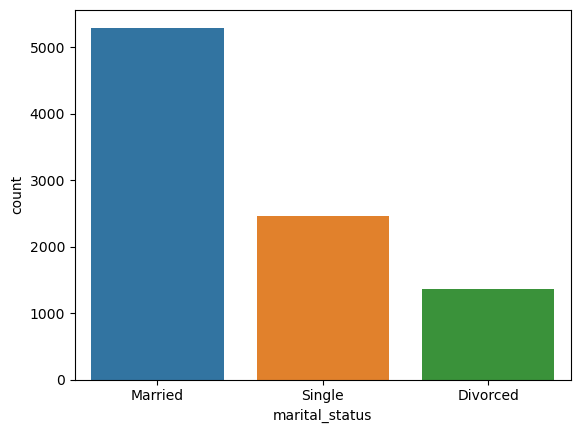

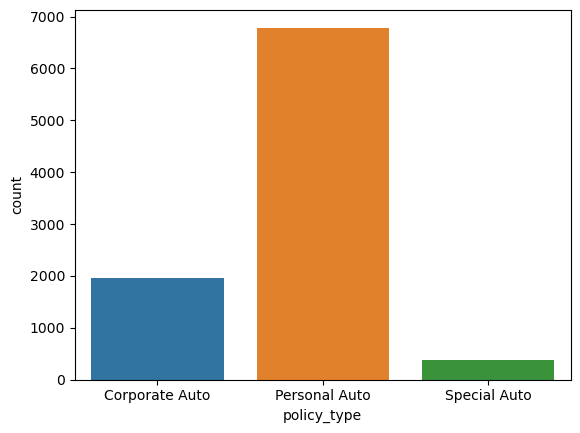

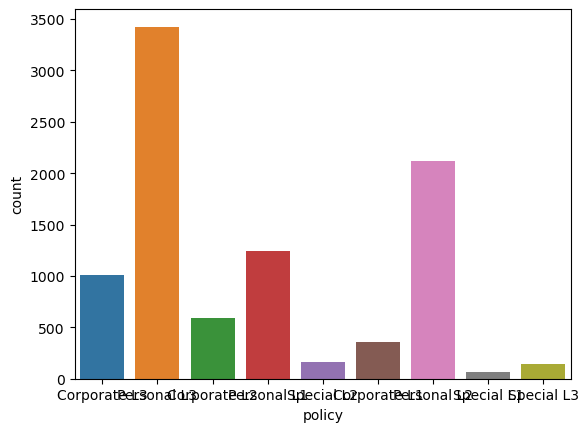

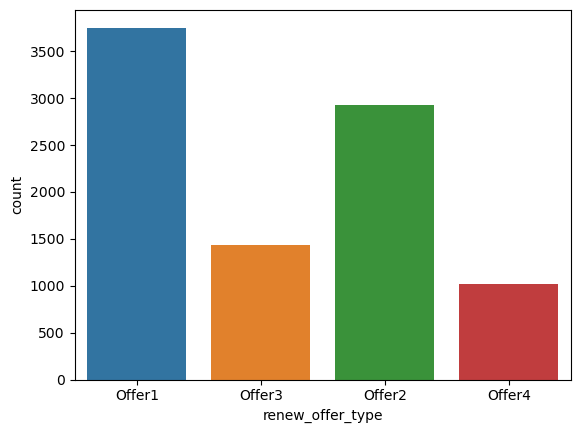

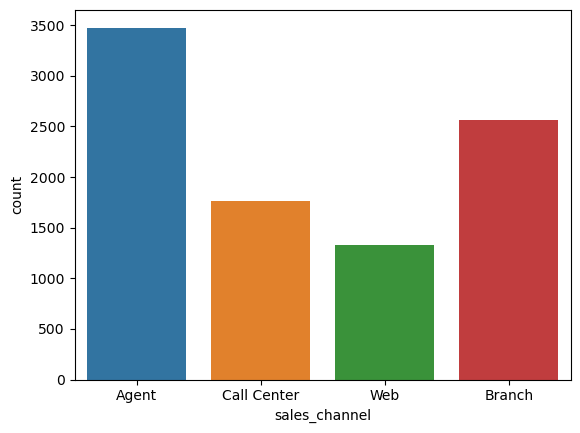

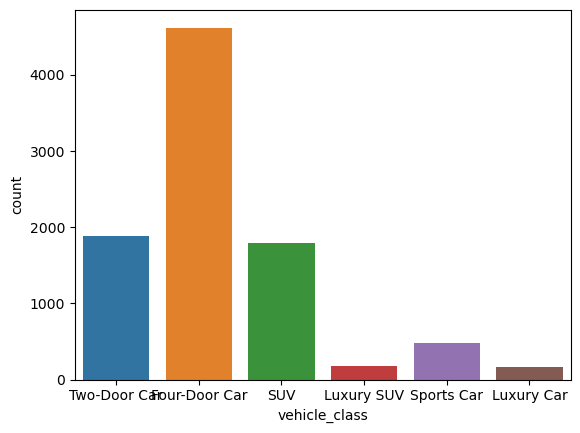

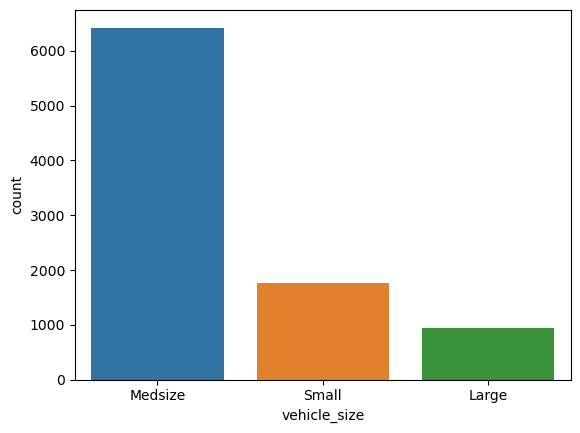

In [177]:
def cntplot_cat(df):
    for col in df.columns:
        sns.countplot(x=df[col])
        plt.show()
    return None
   

cntplot_cat(categorical_df)

we are going the make some changes in the data :
- in 'employment status' : we are grouping medical leaves, disabled and retires to a category 'other'
- 'renew_offer_type : changing the numerical values into a categorical value
- vehicule_class : we group 'luxury SUV', 'Sports' and 'Luxury cars' into a 'premium' category
- policy_type : we remove 'auto'  from the values in that column
- education was also grouped into categories, master degree and doctor degre can be put into 'college'.

In [178]:
# removing 'auto' in the policy_type
def get_auto(x):
    x = str(x)
    x = x.rstrip(' Auto')
    return str(x)

categorical_df['policy_type'] = categorical_df['policy_type'].apply(get_auto)


In [179]:
# changing number into strings in renew_offer_type :
categorical_df['renew_offer_type'] = categorical_df['renew_offer_type'].str.replace('1', 'A')
categorical_df['renew_offer_type'] = categorical_df['renew_offer_type'].str.replace('2', 'B')
categorical_df['renew_offer_type'] = categorical_df['renew_offer_type'].str.replace('3', 'C')
categorical_df['renew_offer_type'] = categorical_df['renew_offer_type'].str.replace('4', 'D')

In [180]:
categorical_df['employmentstatus'] = np.where(categorical_df.employmentstatus.isin(['Disabled', 'Retired', 'Medical Leave']),'other', categorical_df.employmentstatus)

In [181]:
categorical_df['vehicle_class'] = np.where(categorical_df.vehicle_class.isin(['Luxury SUV', 'Sports Car', 'Luxury Car']),'premium', categorical_df.vehicle_class)

In [182]:
# education was also grouped Master degree and Doctor's degree into college

categorical_df["education"] = np.where(categorical_df.education.isin(['High School or Below']),'pre_college', categorical_df.education)
# categorical_df.head(25)

def educ(x):
    if 'Master' in x:
        return 'College'
    elif 'Doctor' in x:
        return 'College'
    # elif 'High School or Below':
    #     return 'pre_college'
    else:
        return x

categorical_df['education'] = list(map(educ,categorical_df['education']))

In [183]:
categorical_df = categorical_df.drop(['policy'], axis = 1)

2. We will start with removing outliers, if you have not already done so.  We have discussed different methods to remove outliers. Use the one you feel more comfortable with, define a function for that. Use the function to remove the outliers and apply it to the dataframe.

In [238]:
# def box_plots():
#     for column in cont_data.columns:
#         sns.boxplot(x=column, data=cont_data)
#         plt.show()
#     return
data_nodate = pd.concat([discrete_df, categorical_df, continuous_df], axis=1)
display(data_nodate)
variable_customer_df.head()

,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,state,response,coverage,education,employmentstatus,...,location_code,marital_status,policy_type,renew_offer_type,sales_channel,vehicle_class,vehicle_size,customer_lifetime_value,income,total_claim_amount
0,69,32,5,0,1,Washington,No,Basic,Bachelor,Employed,...,Suburban,Married,Corporate,OfferA,Agent,Two-Door Car,Medsize,2763.519279,56274,384.811147
1,94,13,42,0,8,Arizona,No,Extended,Bachelor,Unemployed,...,Suburban,Single,Personal,OfferC,Agent,Four-Door Car,Medsize,6979.535903,0,1131.464935
2,108,18,38,0,2,Nevada,No,Premium,Bachelor,Employed,...,Suburban,Married,Personal,OfferA,Agent,Two-Door Car,Medsize,12887.431650,48767,566.472247
3,106,18,65,0,7,California,No,Basic,Bachelor,Unemployed,...,Suburban,Married,Corporate,OfferA,Call Center,SUV,Medsize,7645.861827,0,529.881344
4,73,12,44,0,1,Washington,No,Basic,Bachelor,Employed,...,Rural,Single,Personal,OfferA,Agent,Four-Door Car,Medsize,2813.692575,43836,138.130879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,73,18,89,0,2,California,No,Basic,Bachelor,Employed,...,Urban,Married,Personal,OfferB,Web,Four-Door Car,Medsize,23405.987980,71941,198.234764
9130,79,14,28,0,1,California,Yes,Extended,College,Employed,...,Suburban,Divorced,Corporate,OfferA,Branch,Four-Door Car,Medsize,3096.511217,21604,379.200000
9131,85,9,37,3,2,California,No,Extended,Bachelor,Unemployed,...,Suburban,Single,Corporate,OfferA,Branch,Four-Door Car,Medsize,8163.890428,0,790.784983
9132,96,34,3,0,3,California,No,Extended,College,Employed,...,Suburban,Married,Personal,OfferC,Branch,Four-Door Car,Large,7524.442436,21941,691.200000


,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [185]:
data= pd.concat([data_nodate, variable_customer_df[['effective_to_date']]], axis =1)
data

,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,state,response,coverage,education,employmentstatus,...,marital_status,policy_type,renew_offer_type,sales_channel,vehicle_class,vehicle_size,customer_lifetime_value,income,total_claim_amount,effective_to_date
0,69,32,5,0,1,Washington,No,Basic,Bachelor,Employed,...,Married,Corporate,OfferA,Agent,Two-Door Car,Medsize,2763.519279,56274,384.811147,2011-02-24
1,94,13,42,0,8,Arizona,No,Extended,Bachelor,Unemployed,...,Single,Personal,OfferC,Agent,Four-Door Car,Medsize,6979.535903,0,1131.464935,2011-01-31
2,108,18,38,0,2,Nevada,No,Premium,Bachelor,Employed,...,Married,Personal,OfferA,Agent,Two-Door Car,Medsize,12887.431650,48767,566.472247,2011-02-19
3,106,18,65,0,7,California,No,Basic,Bachelor,Unemployed,...,Married,Corporate,OfferA,Call Center,SUV,Medsize,7645.861827,0,529.881344,2011-01-20
4,73,12,44,0,1,Washington,No,Basic,Bachelor,Employed,...,Single,Personal,OfferA,Agent,Four-Door Car,Medsize,2813.692575,43836,138.130879,2011-02-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,73,18,89,0,2,California,No,Basic,Bachelor,Employed,...,Married,Personal,OfferB,Web,Four-Door Car,Medsize,23405.987980,71941,198.234764,2011-02-10
9130,79,14,28,0,1,California,Yes,Extended,College,Employed,...,Divorced,Corporate,OfferA,Branch,Four-Door Car,Medsize,3096.511217,21604,379.200000,2011-02-12
9131,85,9,37,3,2,California,No,Extended,Bachelor,Unemployed,...,Single,Corporate,OfferA,Branch,Four-Door Car,Medsize,8163.890428,0,790.784983,2011-02-06
9132,96,34,3,0,3,California,No,Extended,College,Employed,...,Married,Personal,OfferC,Branch,Four-Door Car,Large,7524.442436,21941,691.200000,2011-02-03


1. In this final lab, we will model our data. Import sklearn `train_test_split` and separate the data.

In [186]:
X = data.drop(['total_claim_amount'], axis = 1)

y = data[['total_claim_amount']]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

dealing with outliers !

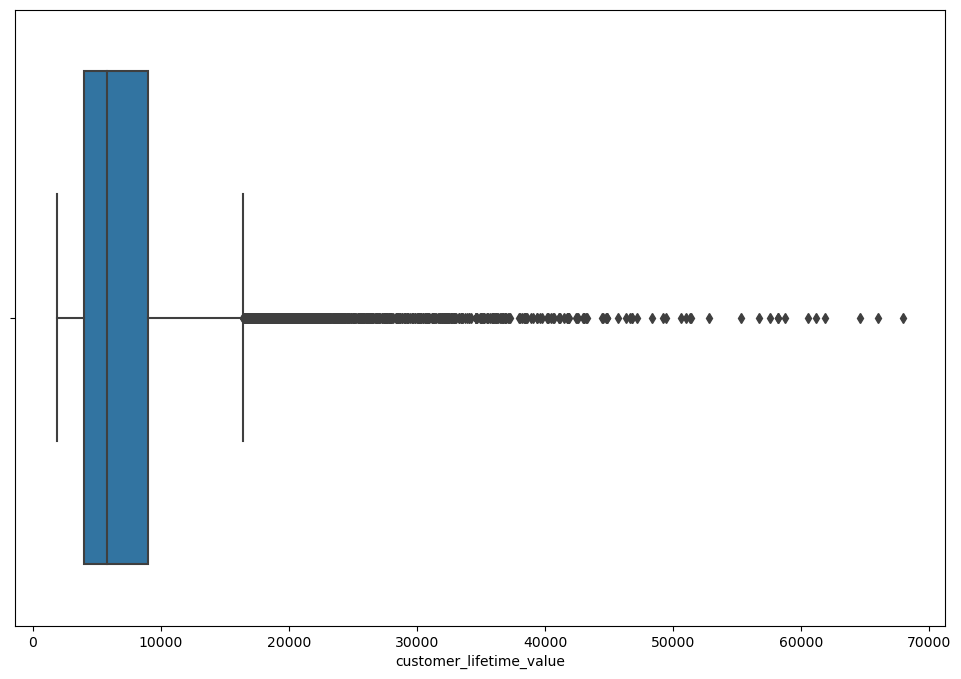

In [187]:
data_out = data[data['customer_lifetime_value']<70000]

plt.figure(figsize = (12,8))
sns.boxplot(data_out['customer_lifetime_value'])
plt.show()



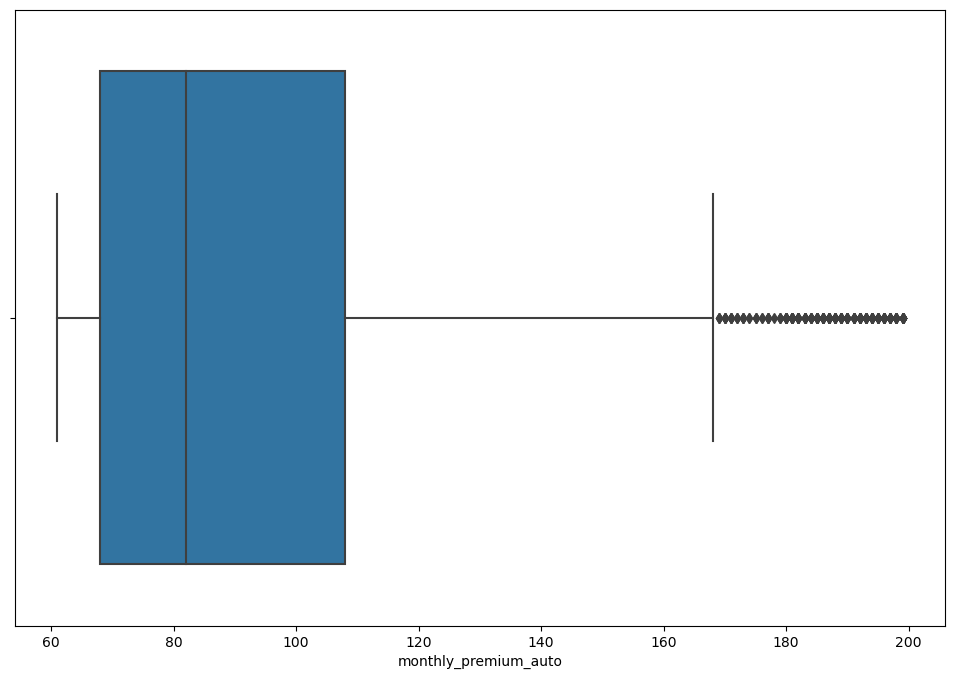

In [188]:
data_out = data[data['monthly_premium_auto']<200]
plt.figure(figsize = (12,8))
sns.boxplot(data_out['monthly_premium_auto'])
plt.show()


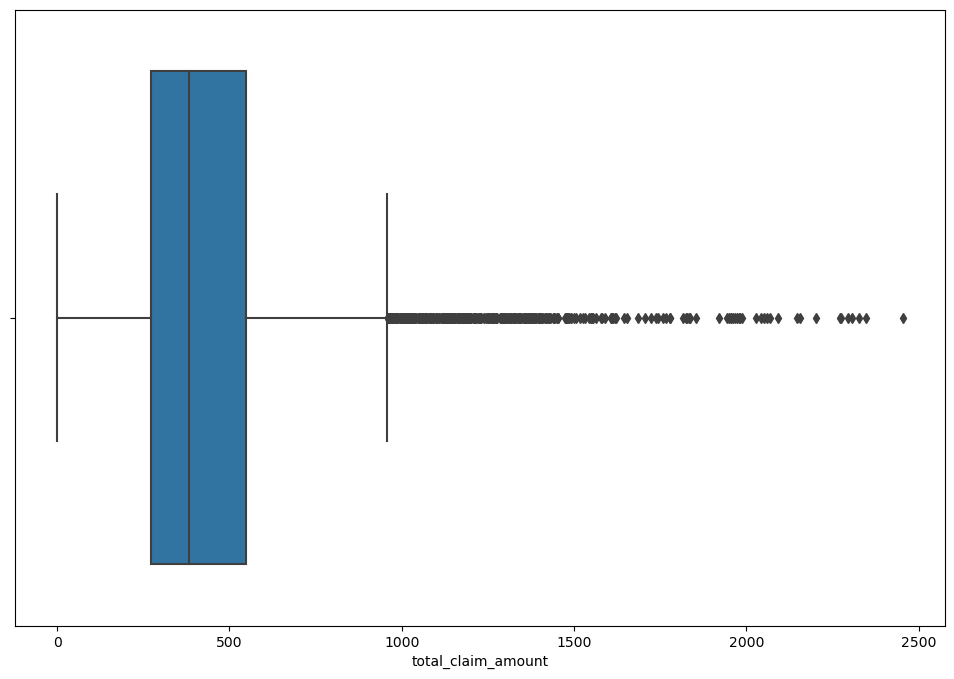

In [189]:
plt.figure(figsize = (12,8))
data_out = data[data['total_claim_amount']<2500]
sns.boxplot(data_out['total_claim_amount'])
plt.show()

In [190]:
data_out # dataframe without outliers assgign !

,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,state,response,coverage,education,employmentstatus,...,marital_status,policy_type,renew_offer_type,sales_channel,vehicle_class,vehicle_size,customer_lifetime_value,income,total_claim_amount,effective_to_date
0,69,32,5,0,1,Washington,No,Basic,Bachelor,Employed,...,Married,Corporate,OfferA,Agent,Two-Door Car,Medsize,2763.519279,56274,384.811147,2011-02-24
1,94,13,42,0,8,Arizona,No,Extended,Bachelor,Unemployed,...,Single,Personal,OfferC,Agent,Four-Door Car,Medsize,6979.535903,0,1131.464935,2011-01-31
2,108,18,38,0,2,Nevada,No,Premium,Bachelor,Employed,...,Married,Personal,OfferA,Agent,Two-Door Car,Medsize,12887.431650,48767,566.472247,2011-02-19
3,106,18,65,0,7,California,No,Basic,Bachelor,Unemployed,...,Married,Corporate,OfferA,Call Center,SUV,Medsize,7645.861827,0,529.881344,2011-01-20
4,73,12,44,0,1,Washington,No,Basic,Bachelor,Employed,...,Single,Personal,OfferA,Agent,Four-Door Car,Medsize,2813.692575,43836,138.130879,2011-02-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,73,18,89,0,2,California,No,Basic,Bachelor,Employed,...,Married,Personal,OfferB,Web,Four-Door Car,Medsize,23405.987980,71941,198.234764,2011-02-10
9130,79,14,28,0,1,California,Yes,Extended,College,Employed,...,Divorced,Corporate,OfferA,Branch,Four-Door Car,Medsize,3096.511217,21604,379.200000,2011-02-12
9131,85,9,37,3,2,California,No,Extended,Bachelor,Unemployed,...,Single,Corporate,OfferA,Branch,Four-Door Car,Medsize,8163.890428,0,790.784983,2011-02-06
9132,96,34,3,0,3,California,No,Extended,College,Employed,...,Married,Personal,OfferC,Branch,Four-Door Car,Large,7524.442436,21941,691.200000,2011-02-03


In [ ]:
X = data_out.drop(['total_claim_amount'], axis = 1)

y = data_out[['total_claim_amount']]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

3. Create a copy of the dataframe for the data wrangling.

In [248]:
data_out_copy = data_out.copy()
data_num = data.select_dtypes(np.number)
data_cat = data.select_dtypes(object)
data_num_cont = data_num[['customer_lifetime_value', 'income', 'total_claim_amount']]
data_num_disc = data_num[['monthly_premium_auto', 'months_since_last_claim', 'months_since_policy_inception', 'number_of_open_complaints', 'number_of_policies']]


,customer_lifetime_value,income,total_claim_amount
0,2763.519279,56274,384.811147
1,6979.535903,0,1131.464935
2,12887.431650,48767,566.472247
3,7645.861827,0,529.881344
4,2813.692575,43836,138.130879
...,...,...,...
9129,23405.987980,71941,198.234764
9130,3096.511217,21604,379.200000
9131,8163.890428,0,790.784983
9132,7524.442436,21941,691.200000


4. Normalize the continuous variables. You can use any one method you want.

we are going to normalize these columns : 	customer_lifetime_value, income and	total_claim_amount

In [192]:
# data_out_copy_num = data_out_copy.select_dtypes(np.number)
# data_out_copy_num
data_out_copy_cont = data_out_copy[['customer_lifetime_value', 'income', 'total_claim_amount']]
data_out_copy_cont


,customer_lifetime_value,income,total_claim_amount
0,2763.519279,56274,384.811147
1,6979.535903,0,1131.464935
2,12887.431650,48767,566.472247
3,7645.861827,0,529.881344
4,2813.692575,43836,138.130879
...,...,...,...
9129,23405.987980,71941,198.234764
9130,3096.511217,21604,379.200000
9131,8163.890428,0,790.784983
9132,7524.442436,21941,691.200000


In [247]:
from sklearn.preprocessing import MinMaxScaler

# data_num_cont
transformer = MinMaxScaler().fit(data_out_copy_cont)
data_out_copy_cont_normalized = transformer.transform(data_out_copy_cont)

data_out_copy_cont_df = pd.DataFrame(data_out_copy_cont_normalized, columns=data_out_copy_cont.columns)
data_out_copy_cont_df

,customer_lifetime_value,income,total_claim_amount
0,0.010629,0.562847,0.132974
1,0.062406,0.000000,0.391051
2,0.134960,0.487763,0.195764
3,0.070589,0.000000,0.183117
4,0.011245,0.438443,0.047710
...,...,...,...
9126,0.264137,0.719547,0.068485
9127,0.014719,0.216081,0.131034
9128,0.076951,0.000000,0.273297
9129,0.069098,0.219452,0.238876


# 5.Encoding 
One hot | state

Ordinal | coverage

Ordinal | employmentstatus

Ordinal | location code

One hot | marital status

One hot | policy type

One hot | policy

One hot | renew offercustomer_df

One hot | sales channel

One hot | vehicle class

Ordinal | vehicle size

In [199]:
data_cat = data.select_dtypes(object)
data_cat

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate,OfferA,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal,OfferC,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal,OfferA,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate,OfferA,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal,OfferA,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal,OfferB,Web,Four-Door Car,Medsize
9130,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate,OfferA,Branch,Four-Door Car,Medsize
9131,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate,OfferA,Branch,Four-Door Car,Medsize
9132,California,No,Extended,College,Employed,M,Suburban,Married,Personal,OfferC,Branch,Four-Door Car,Large


In [208]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

OneHotEncoder

In [218]:
data_cat_1 = data[['state', 'employmentstatus', 'marital_status', 'policy_type', 'renew_offer_type', 'sales_channel', 'vehicle_class']]
encoder_1 = OneHotEncoder(handle_unknown = 'ignore').fit(data_cat_1)
encoded_1 = encoder_1.transform(data_cat_1).toarray()
cols = encoder_1.get_feature_names(input_features = data_cat_1.columns)
encoded_1_df = pd.DataFrame(encoded_1, columns= cols)
encoded_1_df

,state_Arizona,state_California,state_Nevada,state_Oregon,state_Washington,employmentstatus_Employed,employmentstatus_Unemployed,employmentstatus_other,marital_status_Divorced,marital_status_Married,...,renew_offer_type_OfferC,renew_offer_type_OfferD,sales_channel_Agent,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Four-Door Car,vehicle_class_SUV,vehicle_class_Two-Door Car,vehicle_class_premium
0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
9130,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
9131,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
9132,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


Ordinal encoder

In [214]:
data_cat_2 = data[['coverage', 'employmentstatus', 'vehicle_size', 'location_code']]

ordinal_encoded = OrdinalEncoder().fit(data_cat_2).transform(data_cat_2)
ordinal_encoded_df = pd.DataFrame(ordinal_encoded,columns=data_cat_2.columns)
ordinal_encoded_df

,coverage,employmentstatus,vehicle_size,location_code
0,0.0,0.0,1.0,1.0
1,1.0,1.0,1.0,1.0
2,2.0,0.0,1.0,1.0
3,0.0,1.0,1.0,1.0
4,0.0,0.0,1.0,0.0
...,...,...,...,...
9129,0.0,0.0,1.0,2.0
9130,1.0,0.0,1.0,1.0
9131,1.0,1.0,1.0,1.0
9132,1.0,0.0,0.0,1.0


6. The time variable can be useful. Try to transform its data into a useful one. Hint: Day week and month as integers might be useful.

In [219]:
data_out_copy_date = data_out_copy[['effective_to_date']]
data_out_copy_date

,effective_to_date
0,2011-02-24
1,2011-01-31
2,2011-02-19
3,2011-01-20
4,2011-02-03
...,...
9129,2011-02-10
9130,2011-02-12
9131,2011-02-06
9132,2011-02-03


In [228]:
import datetime
data_out_copy['week'] =  data_out_copy['effective_to_date'].dt.isocalendar().week
data_out_copy['day'] =  data_out_copy['effective_to_date'].dt.isocalendar().day
data_out_copy['month'] =  data_out_copy['effective_to_date'].dt.month
data_out_copy


,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,state,response,coverage,education,employmentstatus,...,vehicle_class,vehicle_size,customer_lifetime_value,income,total_claim_amount,effective_to_date,week,day,month,year
0,69,32,5,0,1,Washington,No,Basic,Bachelor,Employed,...,Two-Door Car,Medsize,2763.519279,56274,384.811147,2011-02-24,8,4,2,2011
1,94,13,42,0,8,Arizona,No,Extended,Bachelor,Unemployed,...,Four-Door Car,Medsize,6979.535903,0,1131.464935,2011-01-31,5,1,1,2011
2,108,18,38,0,2,Nevada,No,Premium,Bachelor,Employed,...,Two-Door Car,Medsize,12887.431650,48767,566.472247,2011-02-19,7,6,2,2011
3,106,18,65,0,7,California,No,Basic,Bachelor,Unemployed,...,SUV,Medsize,7645.861827,0,529.881344,2011-01-20,3,4,1,2011
4,73,12,44,0,1,Washington,No,Basic,Bachelor,Employed,...,Four-Door Car,Medsize,2813.692575,43836,138.130879,2011-02-03,5,4,2,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,73,18,89,0,2,California,No,Basic,Bachelor,Employed,...,Four-Door Car,Medsize,23405.987980,71941,198.234764,2011-02-10,6,4,2,2011
9130,79,14,28,0,1,California,Yes,Extended,College,Employed,...,Four-Door Car,Medsize,3096.511217,21604,379.200000,2011-02-12,6,6,2,2011
9131,85,9,37,3,2,California,No,Extended,Bachelor,Unemployed,...,Four-Door Car,Medsize,8163.890428,0,790.784983,2011-02-06,5,7,2,2011
9132,96,34,3,0,3,California,No,Extended,College,Employed,...,Four-Door Car,Large,7524.442436,21941,691.200000,2011-02-03,5,4,2,2011


7. Since the model will only accept numerical data, check and make sure that every column is numerical, if some are not, change it using encoding.

concat time !

In [236]:
data_out_copy_disc = data_out_copy[['monthly_premium_auto', 'months_since_last_claim', 'months_since_policy_inception', 'number_of_open_complaints', 'number_of_policies']]


transformerd = MinMaxScaler().fit(data_out_copy_disc)
data_out_copy_disc_normalized = transformerd.transform(data_out_copy_disc)

data_out_copy_disc_df = pd.DataFrame(data_out_copy_disc_normalized, columns=data_out_copy_disc.columns)
data_out_copy_disc_df

,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,0.033755,0.914286,0.050505,0.0,0.000
1,0.139241,0.371429,0.424242,0.0,0.875
2,0.198312,0.514286,0.383838,0.0,0.125
3,0.189873,0.514286,0.656566,0.0,0.750
4,0.050633,0.342857,0.444444,0.0,0.000
...,...,...,...,...,...
9126,0.050633,0.514286,0.898990,0.0,0.125
9127,0.075949,0.400000,0.282828,0.0,0.000
9128,0.101266,0.257143,0.373737,0.6,0.125
9129,0.147679,0.971429,0.030303,0.0,0.250


In [237]:
# day 
# week
# month


data_out_copy_concat = pd.concat([data_out_copy_cont_df, ordinal_encoded_df, encoded_1_df, data_out_copy_disc_df], axis = 1)
data_out_copy_concat

,customer_lifetime_value,income,total_claim_amount,coverage,employmentstatus,vehicle_size,location_code,state_Arizona,state_California,state_Nevada,...,sales_channel_Web,vehicle_class_Four-Door Car,vehicle_class_SUV,vehicle_class_Two-Door Car,vehicle_class_premium,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,0.010629,0.562847,0.156846,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.033755,0.914286,0.050505,0.0,0.000
1,0.062406,0.000000,0.461256,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.139241,0.371429,0.424242,0.0,0.875
2,0.134960,0.487763,0.230909,2.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.198312,0.514286,0.383838,0.0,0.125
3,0.070589,0.000000,0.215991,0.0,1.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.189873,0.514286,0.656566,0.0,0.750
4,0.011245,0.438443,0.056275,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.050633,0.342857,0.444444,0.0,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,0.069098,0.219452,0.281761,0.0,0.0,1.0,2.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.147679,0.971429,0.030303,0.0,0.250
9130,0.008766,0.000000,0.150645,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.067511,0.085714,0.909091,0.0,0.000
9131,NaN,NaN,NaN,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
9132,NaN,NaN,NaN,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN


9. Great! Now define a function that takes a list of models and train (and tests) them so we can try a lot of them without repeating code.

In [249]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.neighbors import KNeighborsRegressor

In [250]:
# Making the function
def modeler(models):
    results = []
    for model in models:
        # Fitting
        model.fit(X_train,y_train)
        # Evaluating
        # R2-Score
        predictions = model.predict(X_train)
        r2score = r2_score(y_train, predictions)
        # Mean Square Error
        mse=mean_squared_error(y_train,predictions)
        # Root Mean Square Error
        rmse = np.sqrt(mse)
        # Mean Absolute Error
        mae = mean_absolute_error(y_train, predictions)
        # Test Data
        # R2-Score
        predictions = model.predict(X_test)
        r2scoret = r2_score(y_test, predictions)
        # Mean Square Error
        mset=mean_squared_error(y_test,predictions)
        # Root Mean Square Error
        rmset = np.sqrt(mset)
        # Mean Absolute Error
        maet = mean_absolute_error(y_test, predictions)
        val = pd.DataFrame({'ValType': ['Train', 'Test'], 'R2-Score': [r2score, r2scoret], 'MSE': [mse, mset] , 'RMSE': [rmse, rmset], 'MAE': [mae, maet]})
        print(model)
        display(val)
        results.append(val)
    return results

In [ ]:

kn_reg = KNeighborsRegressor(n_neighbors=3)
modellist.append(kn_reg)

results = modeler(modellist)